In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


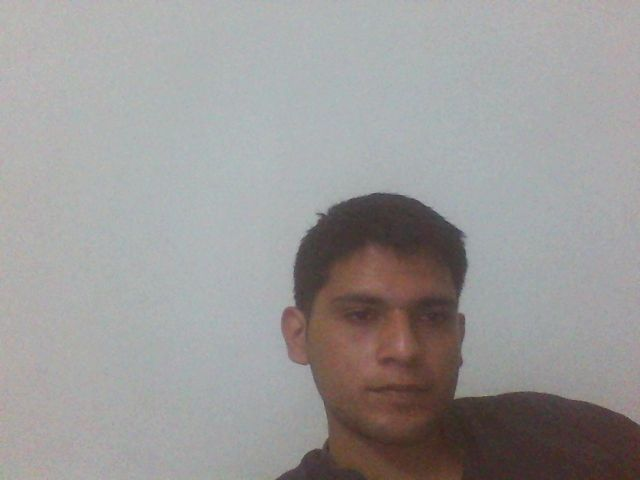

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.5/105.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 60.6 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117030 sha256=2968b0507e26da3f828a065a09b55a2122130abcc6815aba12042502bb3ca915
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


24-08-15 16:38:47 - vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:03<00:00, 176MB/s]


Match found with fawad.jpg


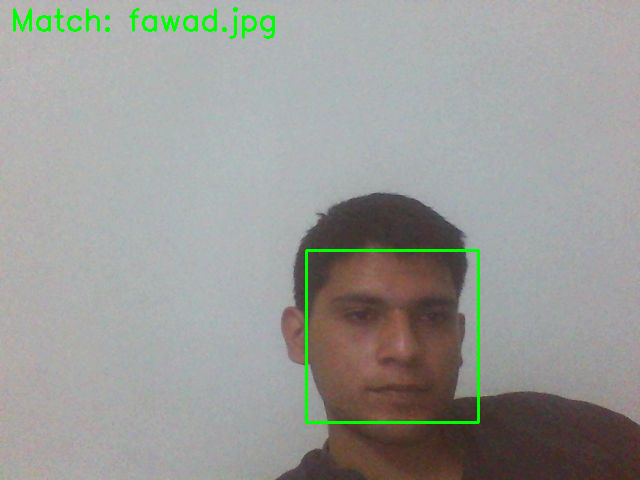

In [ ]:
from deepface import DeepFace
import cv2
from google.colab.patches import cv2_imshow
import os

# Set the directory for the reference images
directory_path = "/content/dataset/"

# Get a list of all files and folders in the specified directory
reference_directory = os.listdir(directory_path)

# Ensure the directory exists
os.makedirs(directory_path, exist_ok=True)

# Load the image to compare
image_to_compare = cv2.imread("/content/photo.jpg")

# Create a Face Cascade Classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Create an empty list to store loaded reference images
loaded_reference_images = []

# Load each reference image individually
for item in reference_directory:
    item_path = os.path.join(directory_path, item)
    if os.path.isfile(item_path):
        reference_image = cv2.imread(item_path)
        loaded_reference_images.append((item, reference_image))

# Initialize a flag indicating whether a match was found
match_found = False

# Perform face recognition for each reference image
for item, reference_image in loaded_reference_images:
    # Detect Faces in the image to compare
    faces = face_cascade.detectMultiScale(image_to_compare, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Draw Rectangles Around Detected Faces
    for (x, y, w, h) in faces:
        cv2.rectangle(image_to_compare, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Perform face recognition
    result = DeepFace.verify(reference_image, image_to_compare)

    # Check if the images match
    if result['verified']:
        print(f"Match found with {item}")
        cv2.putText(image_to_compare, f'Match: {item}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        match_found = True
        break  # Break after the first match if you only want to identify the first match

# If no match is found, display "No match found" text
if not match_found:
    cv2.putText(image_to_compare, 'No match found', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Display the image with the result
cv2_imshow(image_to_compare)
